## Prerequisite

* Tensorrt Container 20.12
* Tao Converter
* convert pruned 2.0 peoplenet to engine file `./tlt-converter resnet34_peoplenet_pruned.etlt -k tlt_encode -d 3,544,960 -t fp16`

In [ ]:
!apt-get update
!apt-get install ffmpeg libsm6 libxext6  -y
!pip install opencv-python matplotlib

### Load Library

In [1]:
from matplotlib import pyplot as plt
import cv2

### Load Images

In [49]:
image = cv2.imread('images/drone_1_3_cropped_screenshot.png')

In [50]:
height, width, channels = image.shape
print(height, width, channels)

1080 1920 3


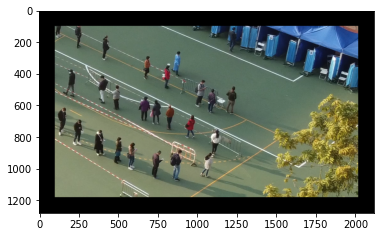

In [51]:
plt.imshow(constant[...,::-1])

## Generate Images

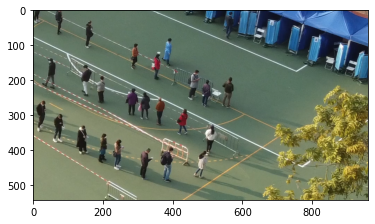

In [52]:
largest_image = cv2.resize(image, (960,544))
plt.imshow(largest_image[...,::-1])

In [53]:
height, width, channels = largest_image.shape
print(height, width, channels)

544 960 3


In [54]:
cv2.imwrite(f'output_images/output_{height}_{width}.jpg', largest_image)

True

In [46]:
WHITE = [255,255,255]
preferred_size = (960,544)
step = 0.05

for i in range(20):
    print(i)
    resized = cv2.resize(largest_image, None, fx=(1-step*i), fy=(1-step*i))
    height, width, channels = resized.shape
    #print(height, width, channels)
    height_pixel_filled = preferred_size[1] - height
    width_pixel_filled = preferred_size[0] - width

    #print(height_pixel_filled, width_pixel_filled)

    if height_pixel_filled % 2 == 0:
        bottom = height_pixel_filled //2
        top = height_pixel_filled //2
    else:
        bottom = height_pixel_filled //2
        top = height_pixel_filled - bottom

    if width_pixel_filled % 2 == 0:
        left = width_pixel_filled //2
        right = left
    else:
        left = width_pixel_filled //2
        right = width_pixel_filled - left

    #print(left, right, top, bottom)

    bordered_image = cv2.copyMakeBorder(resized.copy(),top,bottom,left,right,cv2.BORDER_CONSTANT,value=BLUE)
    cv2.imwrite(f'output_images/output_{height}_{width}.jpg', bordered_image)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
